<a href="https://colab.research.google.com/github/haksing/-2024-1.13-start/blob/master/chapter03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Chapter 3. Interpolation and Polynomial Approximation
## 3.1 Interpolation and the Lagrange Polynomial

### Theorem 3.2

If $x_0,\ x_1,\ \cdots,\ x_n$ are $n+1$ distinct numbers and $f$ is a function whose values are given at these numbers, then a unique polynomial $P(x)$ of degree at most $n$ exists with
$$f(x_k) = P(x_k),\qquad \text{for each}\ k = 0,1,\cdots,n.$$
This polynomial is given by
$$P(x) = f(x_0) L_{n,0}(x) + \cdots + f(x_n) L_{n,n}(x) = \sum_{k=0}^n f(x_k) L_{n,k}(x),$$
where, for each $k=0,1,\cdots,n$,
$$L_{n,k}(x) = \frac{(x-x_0)(x-x_1)\cdots(x-x_{k-1})(x-x_{k+1})\cdots(x-x_n)}{(x_k-x_0)(x_k-x_1)\cdots(x_k-x_{k-1})(x_k-x_{k+1})\cdots(x_k-x_n)} = \prod_{\substack{i=0\\ i\neq k}}^n \frac{(x-x_i)}{(x_k - x_i)}.$$

### Q1: Write the appropriate code for the 'None' position.
(Hint: See the last equation in the above theorem)

In [41]:
import numpy as np

def Lagrange_polynomial(t,x,fval):
    n = x.shape[0]
    L = np.ones(n)
    for i in range(0,n):
        for j in range(0,n):
            if i!=j:
                L[i] *= (t-x[j])/(x[i]-x[j])
    val = np.sum(L*fval)
    return val

### Example 2
Use the numbers (called nodes) $x_0 = 2,\ x_1 = 2.75$, and $x_2 = 4$ to find the second Lagrange interpolating polynomial for $f(x) = 1/x$ and approximate $f(3) = 1/3$.

In [46]:
x = np.array([0, 0.6, 0.9])
fval = np.cos(x)
t = 0.45
val = Lagrange_polynomial(t,x,fval)
print(val)

0.898100074705722


ans
```
0.3295454545454546
```

In [36]:
t = np.linspace(0.2,5.2,200)
val = np.zeros_like(t)
for j in range(len(t)):
    val[j] = Lagrange_polynomial(t[j],x,fval)

Text(0.5, 1.0, 'Lagrange Interpolating Polynomial with $x_0$ = 2.0, $x_1$ = 2.75, and $x_2$ = 4.0')

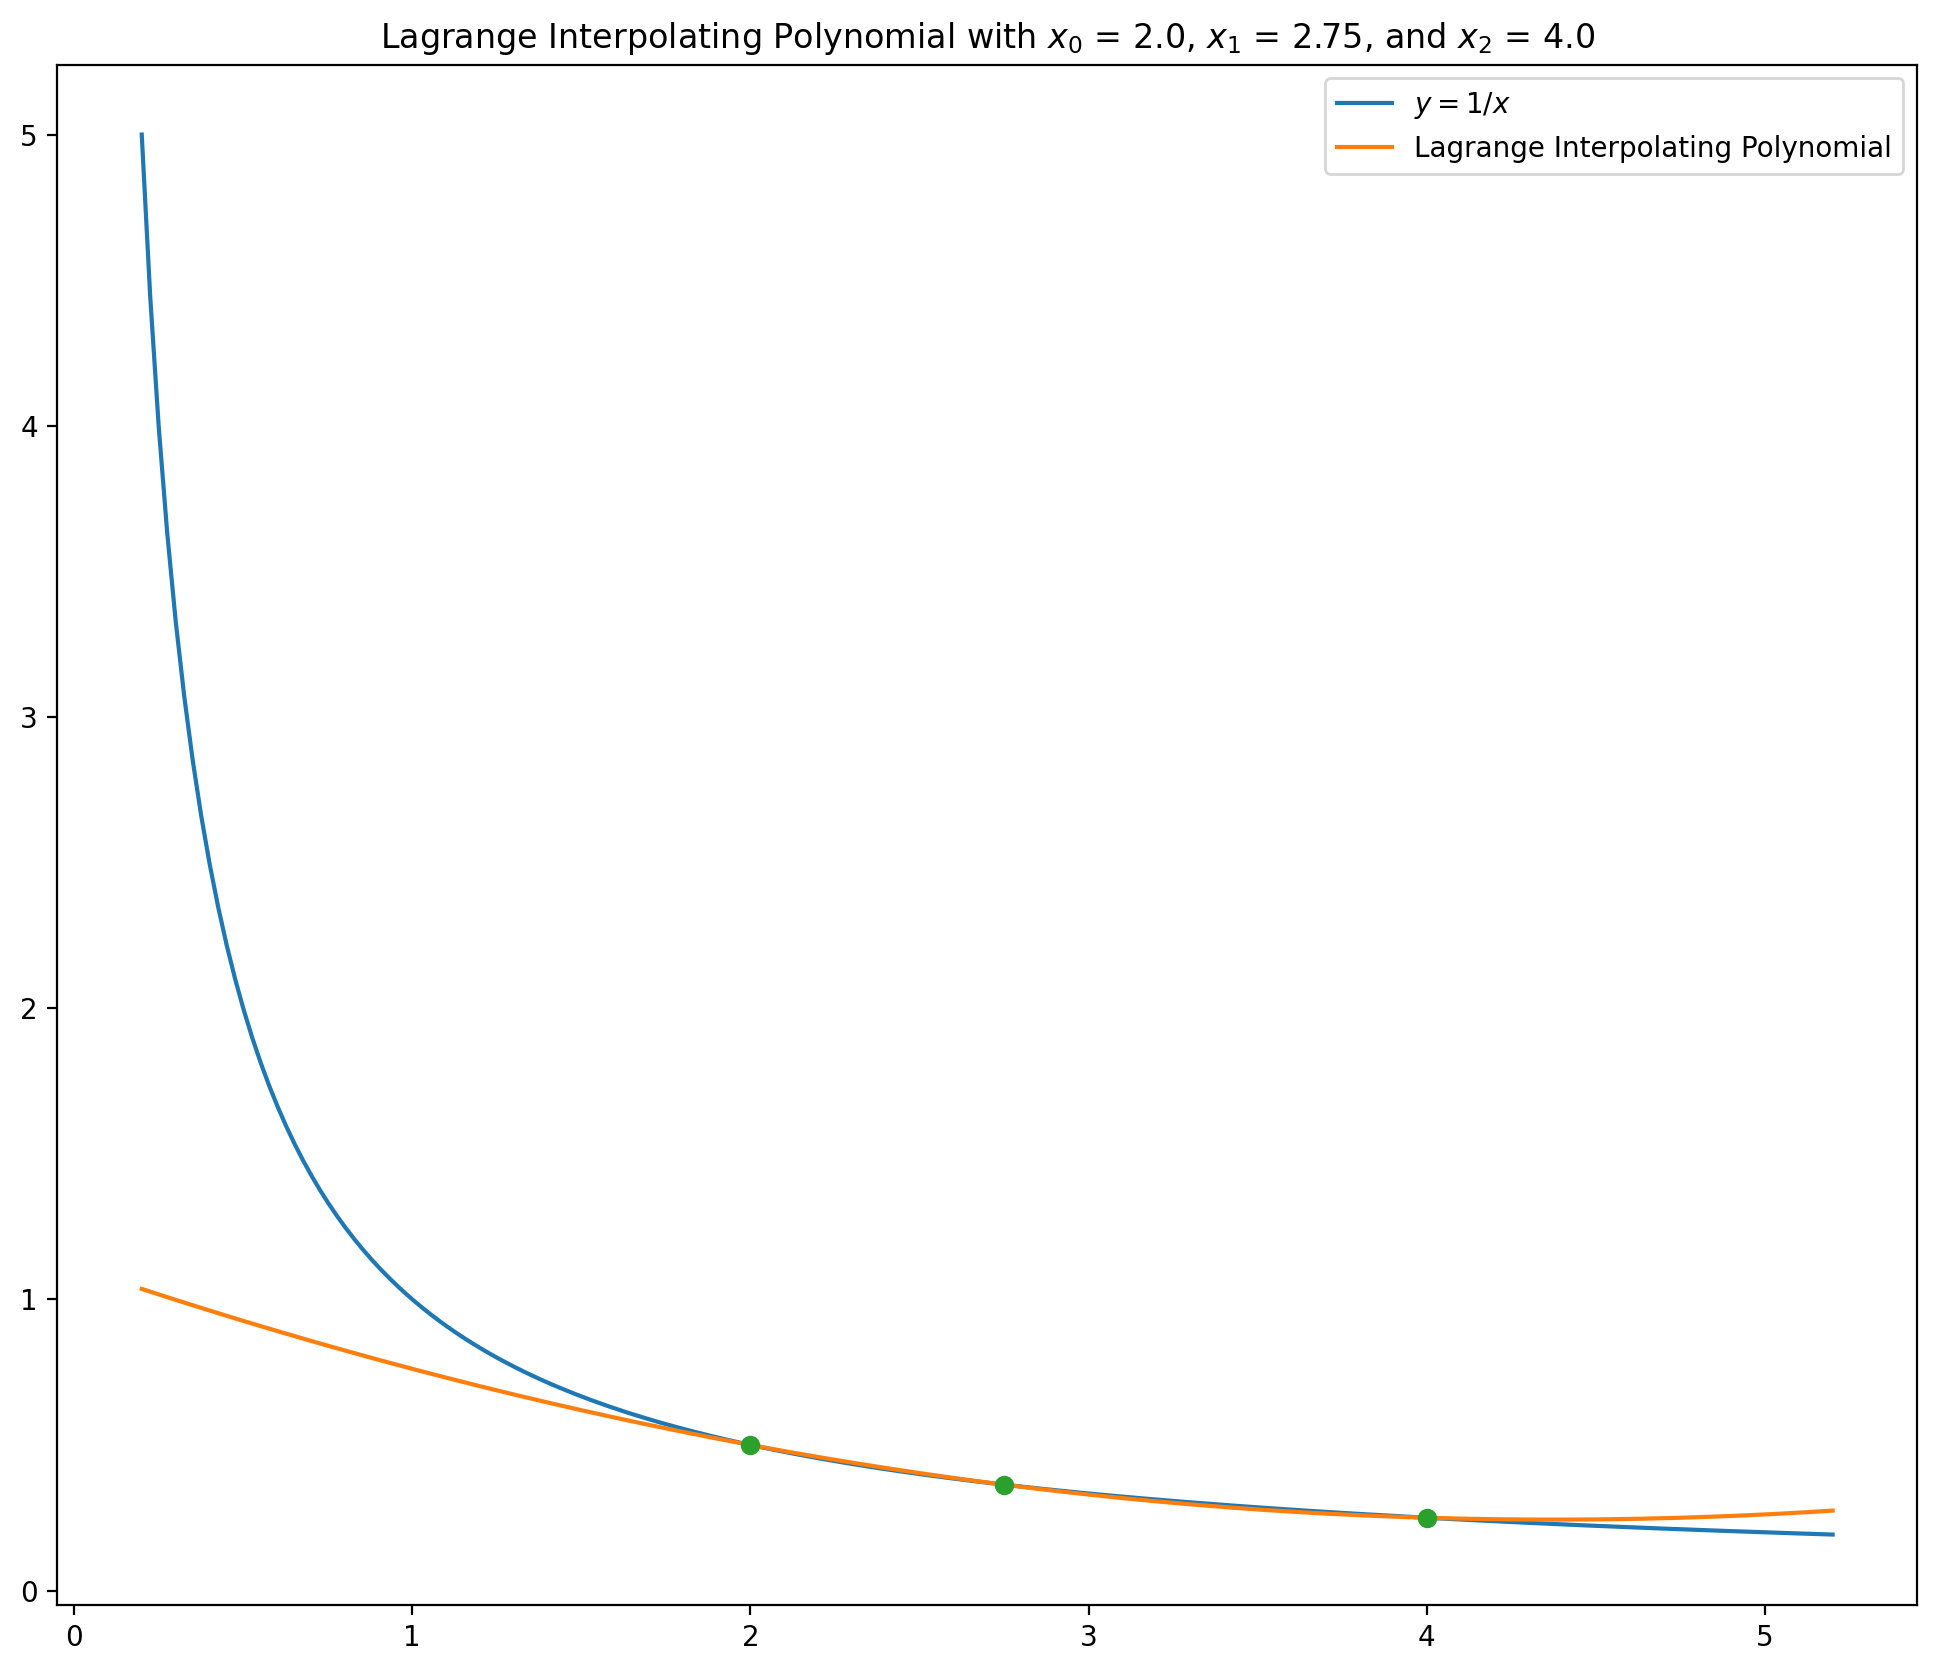

In [37]:
plt.figure(figsize=(12,10))
plt.plot(t,1/t, label = '$y = 1/x$')
plt.plot(t,val, label = 'Lagrange Interpolating Polynomial')
plt.plot(x,1/x,'o')
plt.legend()
plt.title('Lagrange Interpolating Polynomial with $x_0$ = {}, $x_1$ = {}, and $x_2$ = {}'.format(x[0],x[1],x[2]))

ans
```
Text(0.5, 1.0, 'Lagrange Interpolating Polynomial with $x_0$ = 2.0, $x_1$ = 2.75, and $x_2$ = 4.0')
```
<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/lagrange_result.png?raw=true" width="700"/>

## 3.3 Divided Differences
### Newton's Divided Difference Formula
<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/divided_difference.png?raw=true" width="900"/>

### Q2: Complete the following code.

In [78]:
def newton_divided_difference(x,fval):
    n = x.shape[0]
    F = np.zeros((n,n))
    F[:,0] = fval
    # Step 1
    for i in range(1,n):
        for j in range(1,i+1):
            F[i,j] = (F[i , j-1] - F[i-1 , j-1] )/ (x[i] - x[i-j])
    return np.diag(F)

### Nested Form

$$p(x) = a_0 + a_1(x − x_0) + a_2(x − x_0)(x − x_1)+\cdots + a_n(x − x_0)(x − x_1) · · · (x − x_{n−1})$$

$$\Downarrow$$

\begin{align*}
p(x) &= a_0 + (x − x_0)(a_1 + (x − x_1)(a_2 + \cdots + (x − x_{n−1})a_n)) \cdots)) \\
&= (\cdots ((a_n(x − x_{n−1}) + a_{n−1})(x − x_{n−2}) + a_{n−2}) \cdots)(x − x_0) + a_0
\end{align*}

### Q3: Complete the following code.

In [79]:
def newton_interpolation(t,x,coef):
    n = len(coef)
    val = coef[n-1]
    for i in reversed(range(n-1)):
        val *= (t - x[i])
        val += coef[i]
    return val

### Example 1
Complete the divided difference table for the data used in Example 2 of Section 3.2, and reproduced in Table 3.10 and construct the interpolating polynomial that uses all these data.

| x | f(x) |
| --- | --- |
| 1.0 | 0.7651977 |
| 1.3 | 0.6200860 |
| 1.6 | 0.4554022 |
| 1.9 | 0.2818186 |
| 2.2 | 0.1103623 |

In [80]:
x = np.array([1.0, 1.3, 1.6, 1.9, 2.2])
fval = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623])

coef = newton_divided_difference(x,fval)
print(coef)

[ 0.7651977  -0.48370567 -0.10873389  0.0658784   0.0018251 ]


ans
```
[ 0.7651977  -0.48370567 -0.10873389  0.0658784   0.0018251 ]
```

In [81]:
t = 1.5
val = newton_interpolation(t,x,coef)
print(val)

0.5118199942386832


ans
```
0.5118199942386832
```

### Example 2 in Section 3.1

In [ ]:
x = np.array([2, 2.75, 4])
fval = 1/x
t = 3
coef = newton_divided_difference(x,fval)
val = newton_interpolation(t,x,coef)
print(val)

ans
```
0.3295454545454546
```

In [ ]:
t = np.linspace(0.2,5.2,200)
val = np.zeros_like(t)
for j in range(len(t)):
    val[j] = newton_interpolation(t[j],x,coef)

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(t,1/t, label = '$y = 1/x$')
plt.plot(t,val, label = 'Newton Interpolating Polynomial')
plt.plot(x,1/x,'o')
plt.legend()
plt.title('Newton Interpolating Polynomial with $x_0$ = {}, $x_1$ = {}, and $x_2$ = {}'.format(x[0],x[1],x[2]))

ans
<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/divided_difference_result.png?raw=true" width="900"/>

## 3.4 Hermite Interpolation
<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/hermite.png?raw=true" width="900"/>

### Q4: Complete the following code.

In [ ]:
def hermite_coef(x,fval,dfval):
    n = len(x)
    z = np.zeros(2*n)
    Q = np.zeros((2*n,2*n))
    # Step 1
    for i in range(n):
        # Step 2
        z[2*i] = None
        z[2*i+1] = None
        Q[2*i,0] = None
        Q[2*i+1,0] = None
        Q[2*i+1,1] = None

        # Step 3
        if i != 0:
            Q[2*i, 1] = None

    # Step 4
    for i in range(2,2*n):
        for j in range(2,i+1):
            Q[i,j] = None
    return (np.diag(Q), z)

### Nested Form

\begin{align*}
	H(x) &= Q_{0,0} + Q_{1,1}(x-x_0) + Q_{2,2}(x-x_0)^2 + Q_{3,3} (x-x_0)^2 (x-x_1) + Q_{4,4}(x-x_0)^2 (x-x_1)^2 \\
	&\qquad + \cdots + Q_{2n+1,2n+1}(x-x_0)^2 (x-x_1)^2 \cdots (x-x_{n-1})^2 (x-x_n)
\end{align*}

$$\Downarrow$$

\begin{align*}
H(x) &= (\cdots ((Q_{2n+1,2n+1}(x − x_{n}) + Q_{2n,2n})(x − x_{n−1}) + Q_{2n−1,2n-1}) \cdots)(x − x_0) + Q_{0,0}
\end{align*}

### Q5: Complete the following code.

In [ ]:
def hermite_interpolation(t,z,coef):
    n = len(coef)
    val = coef[n-1]
    for i in reversed(range(n-1)):
        val *= None
        val += None
    return val

### Example 2
Use the data given in Example 1 and the divided difference method to determine the Hermite polynomial approximation at x = 1.5.

| $k$ | $x_k$ | $f(x_k)$ | $f'(x_k)$ |
| --- | --- | --- | --- |
| $0$ | $1.3$ | $0.6200860$ | $−0.5220232$ |
| $1$ | $1.6$ | $0.4554022$ | $−0.5698959$ |
| $2$ | $1.9$ | $0.2818186$ | $−0.5811571$ |

In [ ]:
x = np.array([1.3, 1.6, 1.9])
fval = np.array([0.6200860, 0.4554022, 0.2818186])
dfval = np.array([-0.5220232, -0.5698959, -0.5811571])

coef, z = hermite_coef(x,fval,dfval)
print(coef)
print(z)

ans
```
[ 0.620086   -0.5220232  -0.08974267  0.06636556  0.00266667 -0.00277469]
[1.3 1.3 1.6 1.6 1.9 1.9]
```

In [ ]:
t = 1.5
val = hermite_interpolation(t,z,coef)
print(val)

ans
```
0.5118277017283951
```

### Example 2 in Section 3.1

In [ ]:
x = np.array([2, 2.75, 4])
fval = 1/x
dfval = -1/x**2
t = 3
coef, z = hermite_coef(x,fval,dfval)
val = hermite_interpolation(t,z,coef)
print(val)

ans
```
0.33329028925619836
```

In [ ]:
t = np.linspace(0.2,5.2,200)
val = np.zeros_like(t)
for j in range(len(t)):
    val[j] = hermite_interpolation(t[j],z,coef)

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(t,1/t, label = '$y = 1/x$')
plt.plot(t,val, label = 'Hermite Interpolating Polynomial')
plt.plot(x,1/x,'o')
plt.legend()
plt.title('Hermite Interpolating Polynomial with $x_0$ = {}, $x_1$ = {}, and $x_2$ = {}'.format(x[0],x[1],x[2]))

ans
<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/hermite_result.png?raw=true" width="900"/>

## 3.5 Cubic Spline Interpolation
### Natural Cubic Spline

<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/natural_cubic.png?raw=true" width="900"/>

### Q6: Complete the following code.

In [ ]:
def natural_cubic_spline(n,x,fval):
    a = fval
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    h = np.zeros(n)
    l = np.zeros(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)
    alpha = np.zeros(n)
    # Step 1
    for i in range(n):

    # Step 2
    for i in range(1,n):

    # Step 3

    # Step 4
    for i in range(1,n):

    # Step 5

    # Step 6
    for j in reversed(range(n)):

    return (a,b,c,d)

### Example 2
Use the data points $(0,1),\ (1,e),\ (2,e^2)$, and $(3,e^3)$ to form a natural spline $S(x)$ that approximates $f(x) = e^x$.

In [ ]:
n = 3
x = np.array([0,1,2,3])
fval = np.exp(x)

In [ ]:
a,b,c,d = natural_cubic_spline(n,x,fval)
print('a = \n', a)
print('b = \n', b)
print('c = \n', c)
print('d = \n', d)

ans
```
a =
 [ 1.          2.71828183  7.3890561  20.08553692]
b =
 [1.46599761 2.22285026 8.80976965]
c =
 [0.         0.75685264 5.83006675 0.        ]
d =
 [ 0.25228421  1.69107137 -1.94335558]
```

In [ ]:
def evaluate_cubic_spline(nodes,x,a,b,c,d):
    val = np.zeros_like(nodes)
    for i in range(len(x)-1):
        ind = (nodes >= x[i]) & (nodes <= x[i+1])
        xx = nodes[ind]
        val[ind] = a[i] + b[i]*(xx - x[i]) + c[i]*(xx-x[i])**2 + d[i]*(xx-x[i])**3
    return val

In [ ]:
nodes = np.linspace(0,3)
fval = evaluate_cubic_spline(nodes,x,a,b,c,d)

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(nodes,np.exp(nodes), label = '$y = e^x$')
plt.plot(nodes,fval, label = 'Natural cubic spline')
plt.plot(x,np.exp(x),'o')
plt.legend()
plt.title('Natural Cubic Spline with n = {}'.format(n))

ans
```
Text(0.5, 1.0, 'Lagrange Interpolating Polynomial with $x_0$ = 2.0, $x_1$ = 2.75, and $x_2$ = 4.0')
```
<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/natural_spline_result.png?raw=true" width="700"/>

In [ ]:
x = np.array([0,0.5,1,1.5,2,2.5,3])
n = len(x)-1
fval = np.exp(x)

In [ ]:
a,b,c,d = natural_cubic_spline(n,x,fval)
nodes = np.linspace(0,3)
fval = evaluate_cubic_spline(nodes,x,a,b,c,d)
plt.figure(figsize=(12,10))
plt.plot(nodes,np.exp(nodes), label = '$y = e^x$')
plt.plot(nodes,fval, label = 'Natural cubic spline')
plt.plot(x,np.exp(x),'o')
plt.legend()
plt.title('Natural Cubic Spline with n = {}'.format(n))

ans
```
Text(0.5, 1.0, 'Natural Cubic Spline with n = 6')
```
<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/natural_spline_result_2.png?raw=true" width="700"/>

### Clamped Cubic Spline

<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/clamped_cubic.png?raw=true" width="900"/>

### Q7: Complete the following code.

In [ ]:
def clamped_cubic_spline(n,x,fval,FPO,FPN):
    a = fval
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    h = np.zeros(n)
    l = np.zeros(n+1)
    mu = np.zeros(n)
    z = np.zeros(n+1)
    alpha = np.zeros(n+1)
    # Step 1
    for i in range(n):

    # Step 2

    # Step 3
    for i in range(1,n):

    # Step 4

    # Step 5
    for i in range(1,n):

    # Step 6

    # Step 7
    for j in reversed(range(n)):

    return (a,b,c,d)

### Example 4
Example 2 used a natural spline and the data points $(0,1),\ (1,e),\ (2,e^2),$ and $(3,e^3)$ to form a new approximating function $S(x)$. Determine the clamped spline $s(x)$ that uses this data and the additional information that, since $f'(x) = e^x$, so $f'(x) = 1$ and $f'(e) = e^3$.

In [ ]:
n = 3
x = np.array([0,1,2,3])
fval = np.exp(x)
FPO = 1
FPN = np.exp(3)

In [ ]:
a,b,c,d = clamped_cubic_spline(n,x,fval,FPO,FPN)
print('a = \n', a)
print('b = \n', b)
print('c = \n', c)
print('d = \n', d)

ans
```
a =
 [ 1.          2.71828183  7.3890561  20.08553692]
b =
 [1.         2.71016299 7.32651634]
c =
 [0.4446825  1.26548049 3.35087286 9.40814772]
d =
 [0.27359933 0.69513079 2.01909162]
 ```

In [ ]:
nodes = np.linspace(0,3)
fvalc = evaluate_cubic_spline(nodes,x,a,b,c,d)
plt.figure(figsize=(12,10))
plt.plot(nodes,np.exp(nodes),'b-',linewidth=2,label = '$y = e^x$')
plt.plot(nodes,fvalc,'r--',linewidth=3,label = 'Clamped cubic spline')
plt.plot(x,np.exp(x),'o')
plt.legend()
plt.title('Clamped Cubic Spline with n = {}'.format(n))

ans
```
Text(0.5, 1.0, 'Clamped Cubic Spline with n = 3')
```
<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/clamped_spline_result.png?raw=true" width="700"/>

In [ ]:
nodes = np.linspace(0,3)
fvalc = evaluate_cubic_spline(nodes,x,a,b,c,d)
an,bn,cn,dn = natural_cubic_spline(n,x,fval)
fvaln = evaluate_cubic_spline(nodes,x,an,bn,cn,dn)
plt.figure(figsize=(12,10))
plt.plot(nodes,np.exp(nodes),'b-',linewidth=2,label = '$y = e^x$')
plt.plot(nodes,fvalc,'r--',linewidth=3,label = 'Clamped cubic spline')
plt.plot(nodes,fvaln,'y-',linewidth=2,label = 'Natural cubic spline')
plt.plot(x,np.exp(x),'o')
plt.legend()
plt.title('Natural and Clamped Cubic Spline with n = {}'.format(n))

ans
```
Text(0.5, 1.0, 'Natural and Clamped Cubic Spline with n = 3')
```
<img src="https://github.com/dw-shin/numerical_analysis/blob/main/figures/clamped_spline_result_2.png?raw=true" width="700"/>